In [1]:
from tensorflow import keras
from keras import layers, models, utils, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('1Datasets/snp500_history.csv')

In [3]:
def DataCompile(data, timelen):
    train_set = data
    
    from sklearn.preprocessing import MinMaxScaler
    
    sc = MinMaxScaler(feature_range = (0, 1))
    train_set = sc.fit_transform(train_set)

    X_train = []
    y_train = []
    for i in range(timelen, len(train_set)):
        X_train.append(train_set[i-timelen:i, 0])
        y_train.append(train_set[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.01, shuffle=False)

    y_test = y_test.reshape(-1, 1)
    y_test = sc.inverse_transform(y_test)

    return X_train, X_test, y_train, y_test, sc

In [4]:
def Visualizator(sc, X_test, y_test):

    lengh = int(len(X_test) / 5)
    
    x1 = X_test[lengh*0:lengh+lengh*0]
    x2 = X_test[lengh*1:lengh+lengh*1]
    x3 = X_test[lengh*2:lengh+lengh*2]
    x4 = X_test[lengh*3:lengh+lengh*3]
    x5 = X_test[lengh*4:lengh+lengh*4]

    y1 = y_test[lengh*0:lengh+lengh*0]
    y2 = y_test[lengh*1:lengh+lengh*1]
    y3 = y_test[lengh*2:lengh+lengh*2]
    y4 = y_test[lengh*3:lengh+lengh*3]
    y5 = y_test[lengh*4:lengh+lengh*4]

    pre1 = model.predict(x1)
    pre2 = model.predict(x2)
    pre3 = model.predict(x3)
    pre4 = model.predict(x4)
    pre5 = model.predict(x5)
    
    pre1 = sc.inverse_transform(pre1)
    pre2 = sc.inverse_transform(pre2)
    pre3 = sc.inverse_transform(pre3)
    pre4 = sc.inverse_transform(pre4)
    pre5 = sc.inverse_transform(pre5)
    
    plt.plot(y1, color = 'red', label = 'real price')
    plt.plot(pre1, color = 'blue', label = 'predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.show()

    plt.plot(y2, color = 'red', label = 'real price')
    plt.plot(pre2, color = 'blue', label = 'predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.show()

    plt.plot(y3, color = 'red', label = 'real price')
    plt.plot(pre3, color = 'blue', label = 'predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.show()

    plt.plot(y4, color = 'red', label = 'real price')
    plt.plot(pre4, color = 'blue', label = 'predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.show()

    plt.plot(y5, color = 'red', label = 'real price')
    plt.plot(pre5, color = 'blue', label = 'predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()
    plt.show()

In [17]:
model = keras.saving.load_model('60stocks.keras')

In [18]:
X_train, X_test, y_train, y_test, sc = DataCompile(data[['Open']], 60)

2/2 [==============================] - 0s 18ms/step


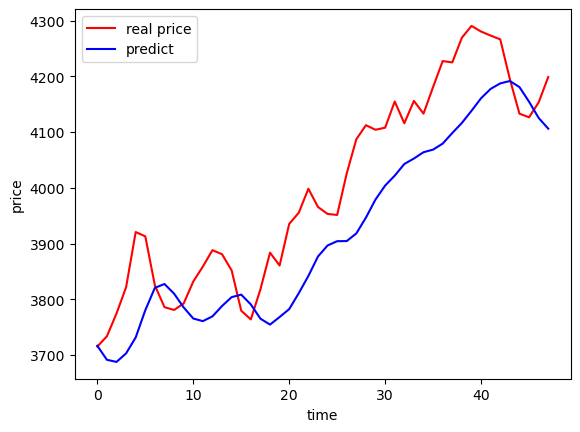

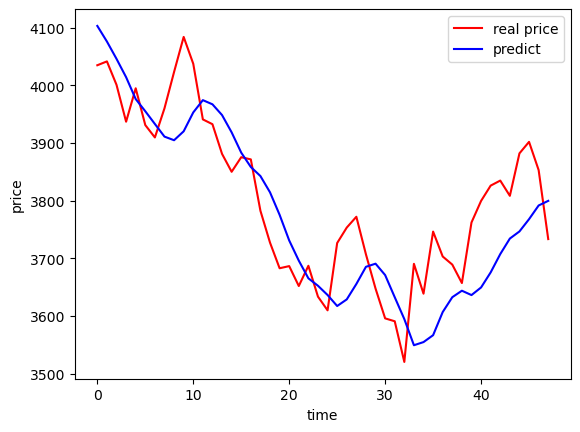

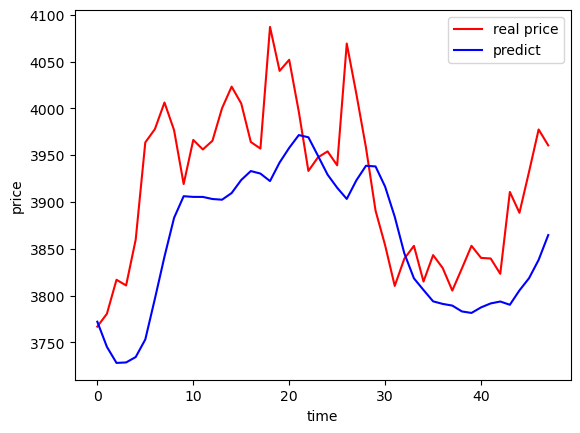

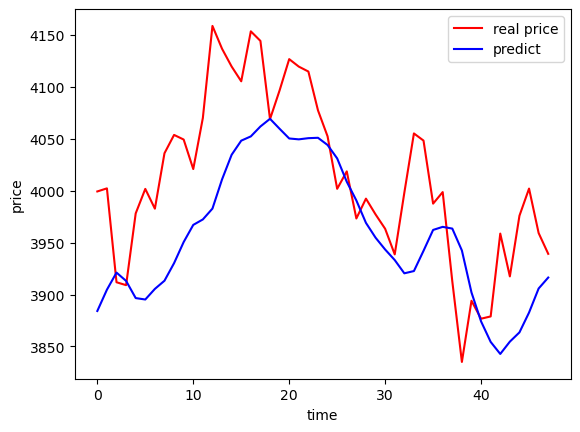

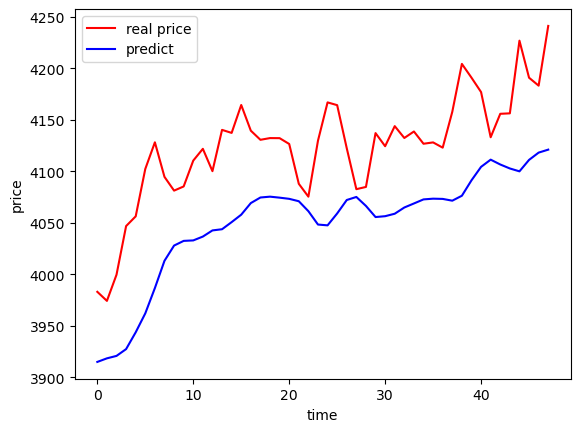

In [19]:
Visualizator(sc, X_test, y_test)